In [1]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

random.seed(231)
# random.seed(420)

learning_rate = 0.001
time_steps = 100
window = 4
epochs = 1500

In [14]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[1] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i] for i in range(0,600,6)]
# training_groups = [[x for x in group] for group in training_set]
# print(len(training_set[0]))
# print(training_set)

In [3]:
# Initialize Network with Nguyen_Widrow weighting
x_network = RNN(window, 3, 1)
# x_network.nguyen_widrow()
# Train Network on First Training Set
# training_set = [float((np.sin(x/2))) for x in range(time_steps)] #Sin training set
error = x_network.train(training_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)

Epoch 0 	MSE 1.2234999731187508
Epoch 100 	MSE 0.5756151028831277
Epoch 200 	MSE 0.5607048455826873
Epoch 300 	MSE 0.5400226057240536
Epoch 400 	MSE 0.5167051806297205
Epoch 500 	MSE 0.48137039388710984
Epoch 600 	MSE 0.3187934316614421
Epoch 700 	MSE 0.26881537521519244
Epoch 800 	MSE 0.24411078778933676
Epoch 900 	MSE 0.22645206341859542
Epoch 1000 	MSE 0.2142930720322279
Epoch 1100 	MSE 0.20571258712544477
Epoch 1200 	MSE 0.19908462175416602
Epoch 1300 	MSE 0.19628161416909493
Epoch 1400 	MSE 0.19877353662054775


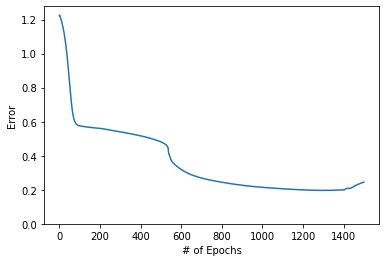

In [10]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

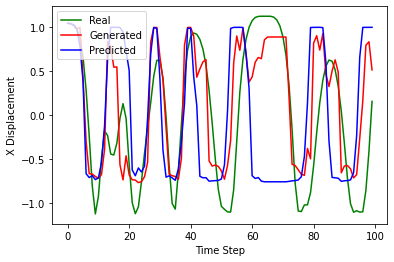

In [15]:
x = training_set[0:4]
x_generated = [*x] #First 4 timesteps come from the original function
x_predicted = [*x]
for time in range(window,time_steps):
    _, y, _ = x_network.feed_forward(training_set[time-window:time])
    _, z, _ = x_network.feed_forward(x)
    # x = z
    x.append(float(z[0]))
    x = x[1:]
    x_predicted.append(*z)
    x_generated.append(*y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:time_steps], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

In [6]:
print(x_network.u)
print(np.array(x_network.w))
print(np.array(x_network.v))

[1.462667738422863, 1.4646941354973704, -0.6205204645849522]
[[ 2.56075915]
 [ 0.78869724]
 [ 2.29015699]
 [-7.67244744]]
[[ 1.10154171  1.33280048  1.1345086 ]
 [ 1.5582151   2.01529719  1.58005698]
 [ 2.29934746 -1.0164534   1.04552202]
 [ 1.2940802  -0.58369856 -1.65331497]
 [ 0.59683577  2.10778891 -2.36232054]]


In [7]:
print(np.clip(x_network.h, -1, 1))

[-0.06221656 -0.06221769 -0.78651299]


<Figure size 432x288 with 0 Axes>

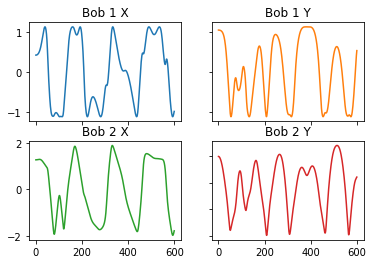

In [8]:
data = training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
x_1 = [row[0] for row in data]
x_2 = [row[2] for row in data]
y_1 = [row[1] for row in data]
y_2 = [row[3] for row in data]

plt.figure(2)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_1)
axs[0, 0].set_title('Bob 1 X')
axs[0, 1].plot(y_1, 'tab:orange')
axs[0, 1].set_title('Bob 1 Y')
axs[1, 0].plot(x_2, 'tab:green')
axs[1, 0].set_title('Bob 2 X')
axs[1, 1].plot(y_2, 'tab:red')
axs[1, 1].set_title('Bob 2 Y')
for ax in fig.get_axes():
    ax.label_outer()
plt.show()

In [9]:
print(error[-1])

0.24522259085864614


In [ ]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[0] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i] for i in range(0,600,6)]

x = training_set[0:4]
x_generated = [*x] #First 4 timesteps come from the original function
x_predicted = [*x]
for time in range(window,time_steps):
    _, y, _ = x_network.feed_forward(training_set[time-window:time])
    _, z, _ = x_network.feed_forward(x)
    # x = z
    x.append(float(z[0]))
    x = x[1:]
    x_predicted.append(*z)
    x_generated.append(*y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:time_steps], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()